# Practicing Feature Engineering on Titanic Data Set_HANDLING MISSING VALUES

In [22]:
import os
os.chdir('/Users/ANIMESH KUMAR MODI/Downloads/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 1.Missing Copletely At Random(MCAR):
no relationship b/w missing and or any other values in the dataset
### example Embarked

In [7]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## 2. Missing data not at random(MNAR) or System missing Values:
relationship b/w missing and or any other values in the dataset
### example Age and Cabin

In [8]:
df['cabin_null']=np.where(df.Cabin.isnull(),1,0)

##percentage of null values in Fare coln
df['cabin_null'].mean()

0.7710437710437711

In [9]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

## 3. Missing at Random
Men hide their salary and women hide their age during surveys

## All techniques to handle missing values

1. MEAN/MEDIAN/MODE replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution Imputation
5. Arbitrary Imputation
6. Frequent Categories Imputaion

## 1.MEAN/MEDIAN/MODE replacement:
When to apply? Only when the NAN values are MCAR.
We solve this by replacing all the NAN values by most frequently occuring observation.

In [10]:
df = pd.read_csv('titanic.csv',usecols=['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
##percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [12]:
def impute_nan(df,feature,median):
    df['imputed_'+feature]=df[feature].fillna(median)

In [13]:
median = df.Age.median()
median

28.0

In [14]:
impute_nan(df,'Age',median)

In [15]:
df.head()

,Survived,Age,Fare,imputed_Age
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [21]:
##minor difference in the standard deviation of Age coln and imputed_Age coln
print(df.Age.std())
print(df.imputed_Age.std())

14.526497332334042
13.019696550973201


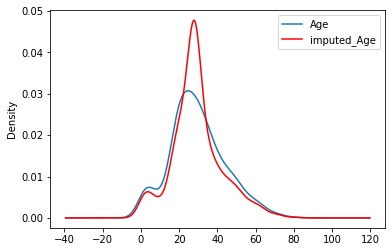

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.imputed_Age.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Advantages of mean/median imputation:
1. easy to implement(Robust to outliers)
2. faster way to obtain complete data set

## Disadvantages:
1.change in the original variance
2. impacts correlation